In [1]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import util
from test_to_bw_fast import read_model
import metrics
import wandb, os
from test_to_bw_fast import get_config
from tfr_evaluate import get_true_pred, change_resolution
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import h5py
from test_to_bw_fast import open_bw
import numpy as np
from sklearn.metrics import mean_squared_error, mean_squared_log_error 
from tqdm import tqdm
from scipy.spatial import distance
from scipy import stats
import pickle
from test_to_bw_fast import get_config, enforce_constant_size
# from metrics import get_pearsonr_per_seq, get_mse, get_js_per_seq, get_poiss_nll
import umap.umap_ as umap
import subprocess
import loss

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
trainset_results = pd.read_csv('/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/model_evaluations/trainset_threshold.csv')

dataset_label = {'peak_centered': 'peak centered',
                'random_chop': 'threshold=2',
                 'threshold_4':'threshold=4',
                 'threshold_6':'threshold=6',
                 'threshold_8':'threshold=8',
                'threshold_10':'threshold=10'}
trainset_results['dataset'] = [dataset_label[d.split('/i_3072')[0].split('/')[-1]] for d in trainset_results['data_dir'].values]

# both_testsets = []
# for testset_type in ['whole', 'idr']:
testset_type='idr'
whole_raw_results = trainset_results[(trainset_results['pred type']=='raw')&
                                    (trainset_results['eval type']==testset_type)]

metrics = whole_raw_results.groupby(['bin_size', 'dataset']).mean().reset_index()
descriptions = whole_raw_results.iloc[:,8:]
avg_metrics_per_run = metrics.merge(descriptions,how='left', on=['bin_size', 'dataset']).drop_duplicates(subset=['bin_size','dataset','eval type'])
# avg_metrics_per_run['testset type'] = testset_type
#     both_testsets.append(avg_metrics_per_run)
# both_testsets = pd.concat(both_testsets)

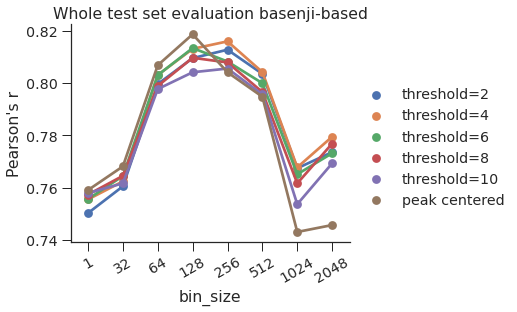

In [7]:
sns.set(font_scale=1.3)  # crazy big
sns.set_style(style='white')
plt.rcParams['xtick.major.size'] = 9
plt.rcParams['xtick.major.width'] = 1

plt.rcParams['ytick.major.size'] = 9
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
fig, axs = plt.subplots(1,1, figsize=[5,4])
# testset_types = ['idr', 'idr']
# titles = ['Whole', 'IDR']
metric = {'Pearson\'s r':'pr_corr'}
# for t, testset_type in enumerate(testset_types[0]):
#     ax=axs[t]
ax=axs
sns.pointplot(data=avg_metrics_per_run, 
              x='bin_size', y=list(metric.values())[0], hue='dataset', ax=ax, 
              hue_order=['threshold=2', 'threshold=4', 'threshold=6', 'threshold=8', 
                         'threshold=10','peak centered'] )
#     ax.set_xticks(rotation=45);
ax.set_title('Whole test set evaluation basenji-based')
plt.legend(loc='lower center',bbox_to_anchor=(1.3,0.1),frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# axs[0].get_legend().remove()
axs.set_ylabel(list(metric.keys())[0]);
# axs[1].set_ylabel('');
plt.xticks(rotation=30);

In [113]:
idr_df = both_testsets[(both_testsets['eval type']=='idr')&
                      (both_testsets['bin_size']==512)]

/home/shush/tf_2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

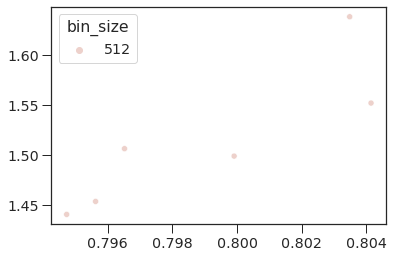

In [114]:
sns.scatterplot(idr_df['pr'].values, idr_df['mse'].values, hue=idr_df['bin_size'],legend="full")